In [5]:
from dataclasses import dataclass
import itertools
import logging
import random
import math
import numpy as np
import json
import pickle
import time
import torch
import sys
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from probe_utils import *

from omegaconf import OmegaConf
from pathlib import Path
from torch import nn, Tensor
from torch.nn import functional as F
from typing import List, Optional, Tuple
import os
# os.chdir("/data/tianyu_guo/birth")
from data import DataArgs, Dataset, iterate_batches, make_dataset
from ihead_full_model import ModelArgs, Transformer, forward_hook

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
run_path_server1="/data/tianyu_guo/birth/gens/pre_final/dormant_copy_interpolate"
run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
hook = forward_hook(target_layers=[], target_name="")
outputs_list_mix_p = {}
attns_to_0_mix_p = {}
trigger_toks_mix_p = {}

mix_p_list = np.arange(0, 0.9, 0.1).tolist()
for mix_p in mix_p_list:
    model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server1, n_layers=1, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=mix_p, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
    _, outputs_list = model.modified_forward_with_hook(x, hook)
    outputs_list_mix_p[mix_p] = outputs_list
    model.cuda()
    trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.89)
    attns_to_0_mix_p[mix_p] = attns_to_0
    trigger_toks_mix_p[mix_p] = trigger_toks


In [7]:
non_attention_sink_num = [(mix_p, len(trigger_toks)) for mix_p, trigger_toks in trigger_toks_mix_p.items()]

In [40]:
[str(mix_p) for mix_p in attns_to_0_mix_p.keys()]

['0.0',
 '0.1',
 '0.2',
 '0.30000000000000004',
 '0.4',
 '0.5',
 '0.6000000000000001',
 '0.7000000000000001',
 '0.8',
 '0.9',
 '1.0']

IndexError: index 10 is out of bounds for axis 0 with size 10

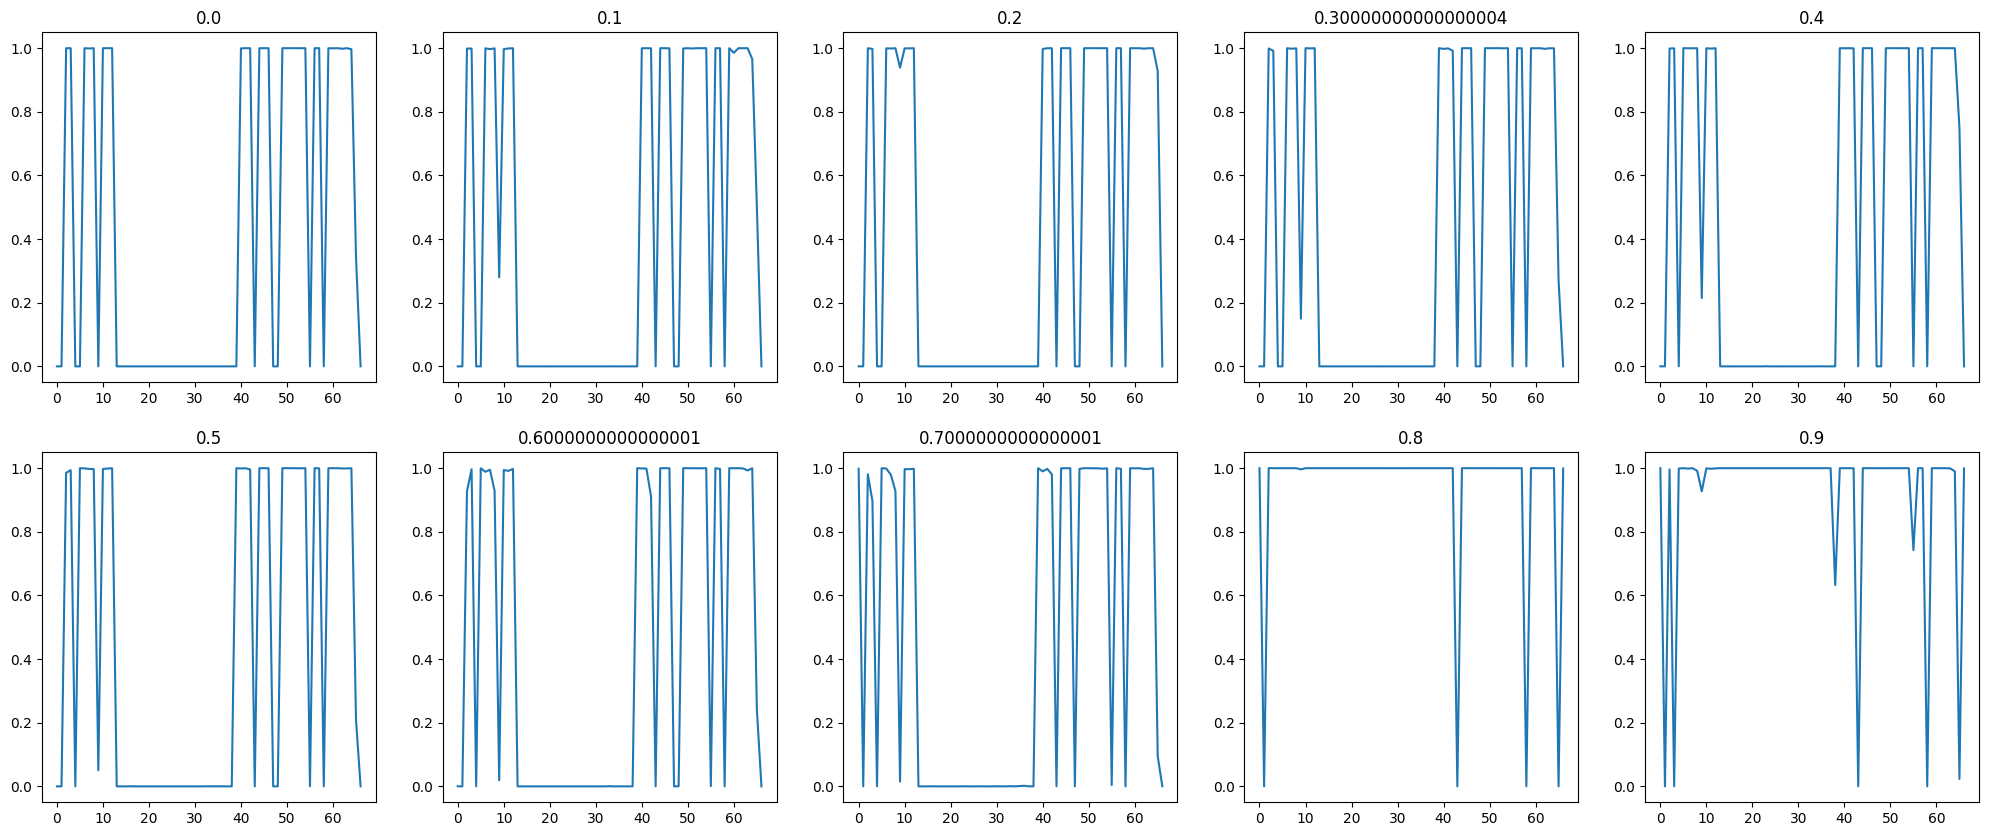

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()
for i, (mix_p, attns_to_0) in enumerate(attns_to_0_mix_p.items()):
    ax = axes[i]
    ax.plot(attns_to_0)
    ax.set_title(str(mix_p))
plt.show()

# Try everything on markov_interpolate

In [46]:
run_path_server1="/data/tianyu_guo/birth/gens/pre_final/dormant_markov_interpolate"
run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_markov_2"
hook = forward_hook(target_layers=[], target_name="")
outputs_list_mix_p_markov = {}
attns_to_0_mix_p_markov = {}
trigger_toks_mix_p_markov = {}

mix_p_list = np.arange(0, 1.1, 0.1).tolist()
for mix_p in mix_p_list:
    model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server1, n_layers=1, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=mix_p, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
    _, outputs_list = model.modified_forward_with_hook(x, hook)
    outputs_list_mix_p_markov[mix_p] = outputs_list
    model.cuda()
    trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.89)
    attns_to_0_mix_p_markov[mix_p] = attns_to_0
    trigger_toks_mix_p_markov[mix_p] = trigger_toks


In [47]:
[(mix_p, len(trigger_toks)) for mix_p, trigger_toks in trigger_toks_mix_p_markov.items()]

[(0.0, 61),
 (0.1, 46),
 (0.2, 40),
 (0.30000000000000004, 40),
 (0.4, 39),
 (0.5, 40),
 (0.6000000000000001, 39),
 (0.7000000000000001, 39),
 (0.8, 38),
 (0.9, 40),
 (1.0, 38)]

IndexError: index 10 is out of bounds for axis 0 with size 10

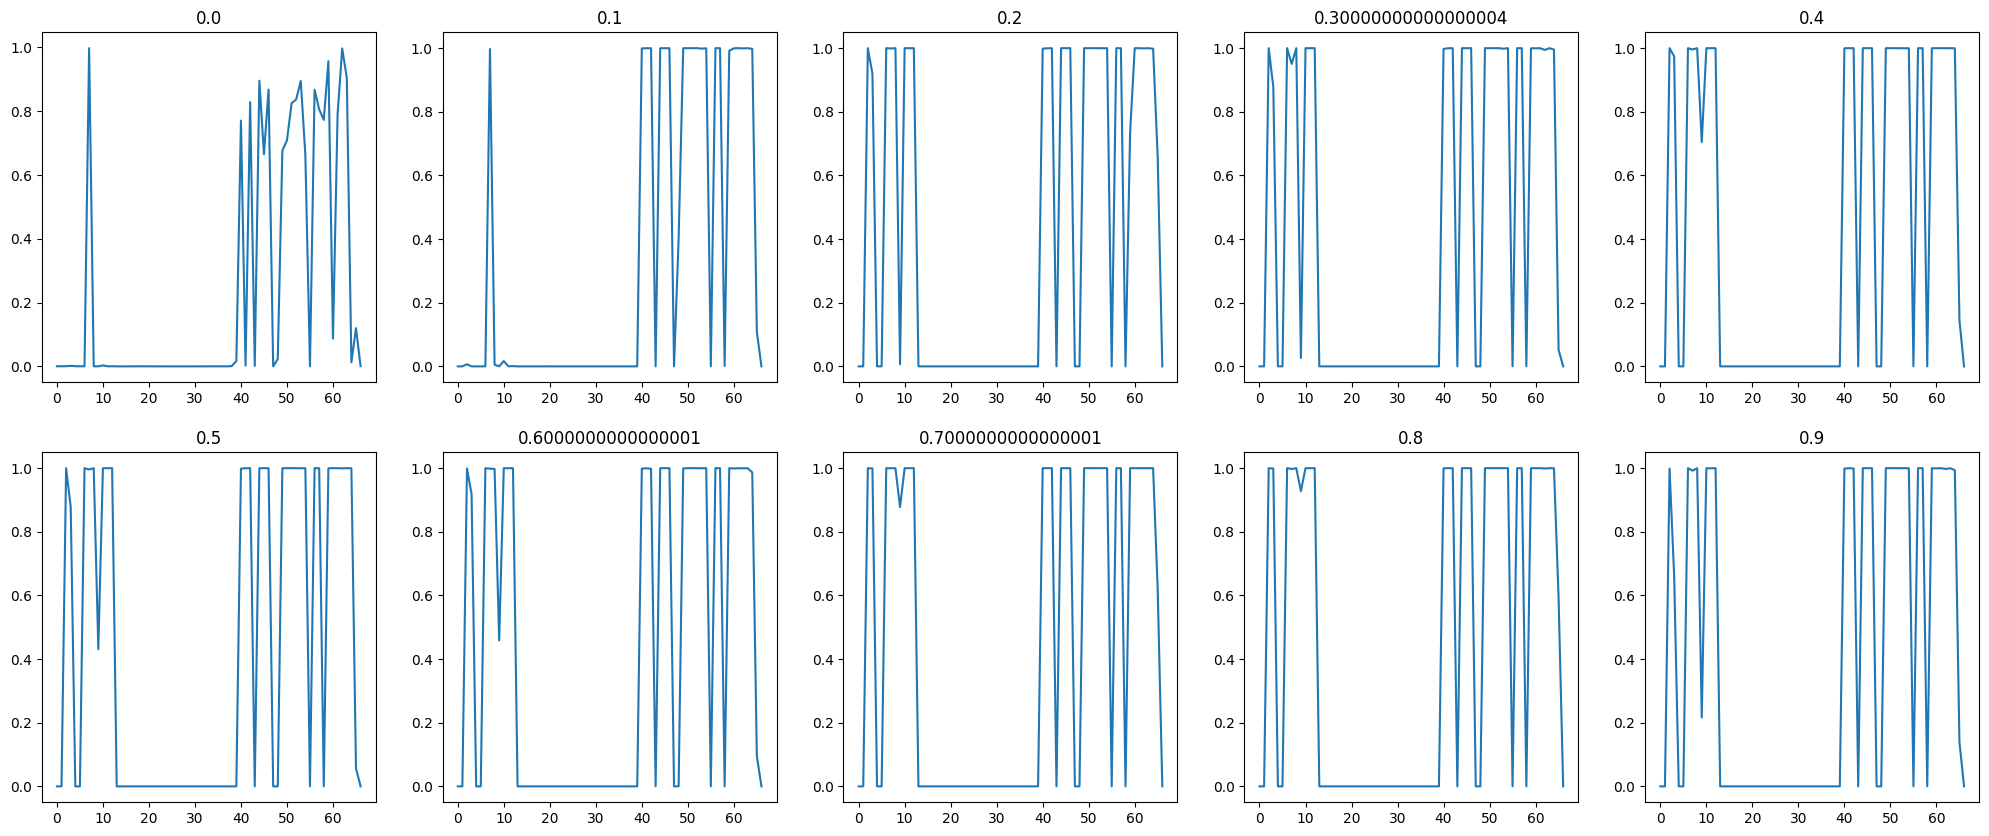

In [48]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()
for i, (mix_p, attns_to_0) in enumerate(attns_to_0_mix_p_markov.items()):
    ax = axes[i]
    ax.plot(attns_to_0)
    ax.set_title(str(mix_p))
plt.show()

In [64]:
get_model_name(n_layers=1, n_heads=1, bos_num=1, train_steps=4999, delim=0, mix_p=0.3,)

'model_L1_H1_bos1_delim0_mix_p0300'

# Try copy_interpolate on more fine grid mix_p parameters

In [114]:
run_path_server1="/data/tianyu_guo/birth/gens/pre_final/dormant_copy_interpolate"
run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
hook = forward_hook(target_layers=[], target_name="")
# outputs_list_mix_p = {}
# attns_to_0_mix_p = {}
# trigger_toks_mix_p = {}

mix_p_list = np.arange(0.79, 0.8, 0.001).tolist()
# mix_p_list = [0.793]
for mix_p in mix_p_list:
    model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server1, n_layers=1, n_heads=1, bos_num=1, train_steps=5000, delim=0, mix_p=mix_p, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
    _, outputs_list = model.modified_forward_with_hook(x, hook)
    outputs_list_mix_p[mix_p] = outputs_list
    model.cuda()
    trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.89)
    attns_to_0_mix_p[mix_p] = attns_to_0
    trigger_toks_mix_p[mix_p] = trigger_toks


In [115]:
[(mix_p, len(trigger_toks)) for mix_p, trigger_toks in trigger_toks_mix_p.items()]

[(0.0, 39),
 (0.1, 39),
 (0.2, 37),
 (0.30000000000000004, 38),
 (0.4, 37),
 (0.5, 37),
 (0.6000000000000001, 37),
 (0.7000000000000001, 35),
 (0.8, 5),
 (0.9, 7),
 (1.0, 7),
 (0.7, 35),
 (0.71, 36),
 (0.72, 36),
 (0.73, 37),
 (0.74, 36),
 (0.75, 38),
 (0.76, 36),
 (0.77, 36),
 (0.78, 36),
 (0.79, 36),
 (0.791, 38),
 (0.792, 40),
 (0.793, 38),
 (0.794, 39),
 (0.795, 39),
 (0.796, 36),
 (0.797, 36),
 (0.798, 41),
 (0.799, 39)]

In [107]:
trigger_toks

[1, 43, 58, 65]

IndexError: index 10 is out of bounds for axis 0 with size 10

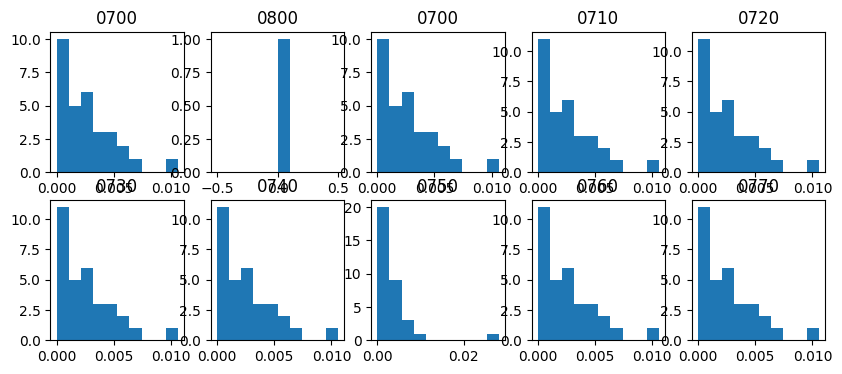

In [108]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()
j = 0
for i, (mix_p, trigger_toks) in enumerate(trigger_toks_mix_p.items()):
    if mix_p>0.8 or mix_p<0.7:
        continue
    ax = axes[j]
    j += 1
    trigger_toks = [tok for tok in trigger_toks if tok not in ds.idxs]
    marginal_subset = ds.marginal[trigger_toks]
    marginal_subset = marginal_subset[marginal_subset < 0.03]
    ax.hist(marginal_subset)
    ax.set_title(float_to_str(mix_p, digits=4))
plt.show()

# test on different seed

In [186]:
run_path_server1="/data/tianyu_guo/birth/gens/pre_final/dormant_copy_interpolate_seed27"
hook = forward_hook(target_layers=[], target_name="")
outputs_list_mix_p_seed27 = {}
attns_to_0_mix_p_seed27 = {}
trigger_toks_mix_p_seed27 = {}

# mix_p_list = np.arange(0.79, 0.8, 0.001).tolist()
mix_p_list = [ 1.0]
for mix_p in mix_p_list:
    model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server1, n_layers=1, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=mix_p, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
    _, outputs_list = model.modified_forward_with_hook(x, hook)
    outputs_list_mix_p_seed27[mix_p] = outputs_list
    model.cuda()
    trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.8)
    attns_to_0_mix_p_seed27[mix_p] = attns_to_0
    trigger_toks_mix_p_seed27[mix_p] = trigger_toks


In [189]:
trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.8)

In [187]:
[(mix_p, len(trigger_toks)) for mix_p, trigger_toks in trigger_toks_mix_p_seed27.items()]

[(1.0, 13)]

<BarContainer object of 67 artists>

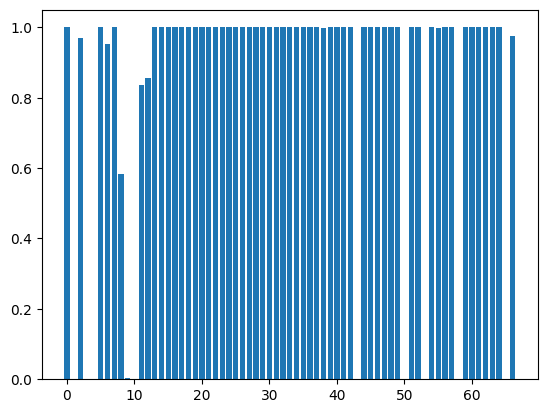

In [188]:
plt.bar(ds.tok_range, attns_to_0_mix_p_seed27[1])

<Axes: title={'center': 'Layer0 Head0'}>

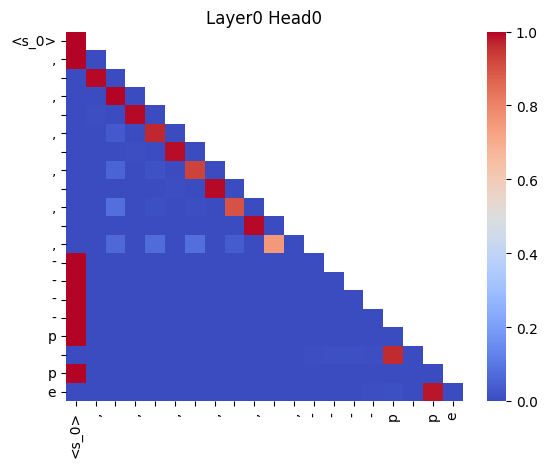

In [127]:
seq_idx, seq_len = 0, 20
text = ds.decode(x[seq_idx, :seq_len].numpy())
fig, ax = plt.subplots()
plot_attns(cfg, ax, seq_idx, 0, 0, seq_len, outputs_list_mix_p_seed27[1.0], text)


# Seed 53

In [11]:
run_path_server1="/data/tianyu_guo/birth/gens/pre_final/dormant_copy_interpolate_seed53"
hook = forward_hook(target_layers=[], target_name="")
outputs_list_mix_p_seed53 = {}
attns_to_0_mix_p_seed53 = {}
trigger_toks_mix_p_seed53 = {}

# mix_p_list = np.arange(0.79, 0.8, 0.001).tolist()
mix_p_list = np.arange(0, 0.9, 0.1).tolist()
for mix_p in mix_p_list:
    model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server1, n_layers=1, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=mix_p, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
    _, outputs_list = model.modified_forward_with_hook(x, hook)
    outputs_list_mix_p_seed53[mix_p] = outputs_list
    model.cuda()
    trigger_toks, attns_to_0, markov_tok = get_triggers(ds, model, hook, cutoff=0.8)
    attns_to_0_mix_p_seed53[mix_p] = attns_to_0
    trigger_toks_mix_p_seed53[mix_p] = trigger_toks


In [12]:
non_attention_sink_num_seed53 = [(mix_p, len(trigger_toks)) for mix_p, trigger_toks in trigger_toks_mix_p_seed53.items()]

In [17]:
num_non_sinks = [non_attention_sink_num_seed53[i][1]/2+non_attention_sink_num[i][1]/2 for i in range(9)]

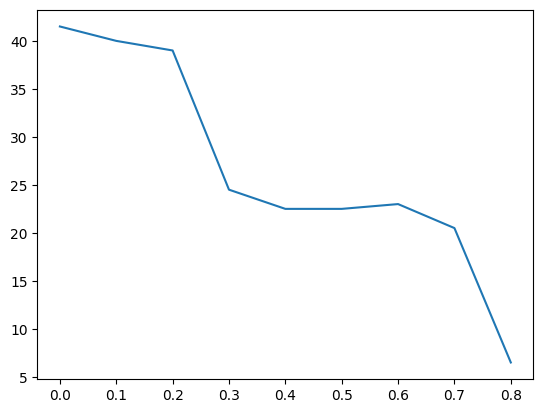

In [18]:

plt.plot(list(map(lambda x: x[0], non_attention_sink_num_seed53)), num_non_sinks)